<a href="https://colab.research.google.com/github/mikhaelput/Project-Data/blob/main/Data_Jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Amnbil Dataset**

In [26]:
!pip install kaggle
import os
import pandas as pd
import subprocess
import zipfile
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Set API Kaggle
os.environ['KAGGLE_USERNAME'] = 'mikhaelputra'
os.environ['KAGGLE_KEY'] = '1a00da4772bac4c5d1735bde5d3457ac'



In [21]:
# Download Dataset
try:
    subprocess.run(['kaggle', 'datasets', 'download', '-d', 'andrewmvd/data-analyst-jobs'], check=True)
    print("Dataset downloaded successfully.")
except subprocess.CalledProcessError as e:
    print(f"Error downloading dataset: {e}")

Dataset downloaded successfully.


In [23]:
# Download data set cara kedua
!kaggle datasets download -d andrewmvd/data-analyst-jobs

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs
License(s): other
data-analyst-jobs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
# Ekstrak file zip
with zipfile.ZipFile('data-analyst-jobs.zip', 'r') as zip_ref:
    zip_ref.extractall('data-analyst-jobs')

In [33]:
# Load dataset
df = pd.read_csv('data-analyst-jobs/DataAnalyst.csv')

In [43]:
# Tampilkan data
print("\nInfo Dataset :")
print(df.info())


Info Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float

In [49]:
# haous data yang kosong
df_cleaned = df.dropna()

print ("Ukuran data setelah hpus baris kosong :", df_cleaned.shape)

df = df.dropna(axis=1, how='all')

Ukuran data setelah hpus baris kosong : (2252, 16)


In [54]:
# Cek apakah ada data kosong / missing
print ("Jumlah data missing / kosong per kolom :")
print (df.isnull().sum())

Jumlah data missing / kosong per kolom :
Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64


In [55]:
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


**Analisa data - Temukan pekerjaan terbaik berdasarkan gaji dan peringkat perusahaan**

In [78]:
import re
import matplotlib.pyplot as plt

In [79]:
analisa_1 = pd.read_csv('data-analyst-jobs/DataAnalyst.csv')
analisa_1 = analisa_1.dropna(subset=['Salary Estimate','Rating'])

In [80]:
# Bersihkan dan ekstrak min/max gaji dari kolom Salary Estimate
def extract_salary(salary_str):
    # Contoh string: "$70K-$90K (Glassdoor est.)"
    salary_str = salary_str.lower().replace('k', '').replace('$', '')
    match = re.findall(r'(\d+)', salary_str)
    if len(match) >= 2:
        min_salary = int(match[0]) * 1000
        max_salary = int(match[1]) * 1000
        return min_salary, max_salary
    return None, None

analisa_1[['MinSalary', 'MaxSalary']] = analisa_1['Salary Estimate'].apply(
    lambda x: pd.Series(extract_salary(x))
)


In [81]:
# Kolom rata-rata gaji
analisa_1['AvgSalary'] = analisa_1[['MinSalary', 'MaxSalary']].mean(axis=1)

In [82]:
# Pengurutan gaji
analisa_1_sorted = analisa_1.sort_values(by=['Rating', 'AvgSalary'], ascending=False)

In [83]:
# Tampilkan pekerjaan terbaik
top_jobs = analisa_1_sorted[['Job Title', 'Company Name', 'Location', 'AvgSalary', 'Rating']].head(10)

print("Top 10 Pekerjaan Terbaik Berdasarkan Gaji dan Rating:")
print(top_jobs)

Top 10 Pekerjaan Terbaik Berdasarkan Gaji dan Rating:
                                            Job Title  \
1484                         AI Insights Data Analyst   
1919             Data Scientist/Analyst - Wilbur Labs   
1929                              Data Studio Analyst   
1944                          Operations Data Analyst   
1957                                     Data Analyst   
1962                              Junior Data Analyst   
688                   Service Operations Data Analyst   
691   Sr Digital Marketing Data Analyst (PAID SOCIAL)   
694                    Analyst, Financial Master Data   
1499                                     Data Analyst   

                               Company Name              Location  AvgSalary  \
1484                         Moveworks\n5.0     Mountain View, CA   150000.0   
1919                       Wilbur Labs\n5.0     San Francisco, CA   138500.0   
1929                      Priceonomics\n5.0     San Francisco, CA   138500.0  

In [91]:
top_salary = top_jobs[['Job Title', 'AvgSalary']].sort_values(by='AvgSalary', ascending=False).head(10)
top_salary_sorted = top_salary.sort_values(by='AvgSalary')

In [90]:
top_salary

,Job Title,AvgSalary
1484,AI Insights Data Analyst,150000.0
1919,Data Scientist/Analyst - Wilbur Labs,138500.0
1929,Data Studio Analyst,138500.0
1944,Operations Data Analyst,126000.0
1957,Data Analyst,126000.0
1962,Junior Data Analyst,126000.0
688,Service Operations Data Analyst,122500.0
691,Sr Digital Marketing Data Analyst (PAID SOCIAL),122500.0
694,"Analyst, Financial Master Data",122500.0
1499,Data Analyst,120000.0


<ipython-input-95-88a199b5325c>:30: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


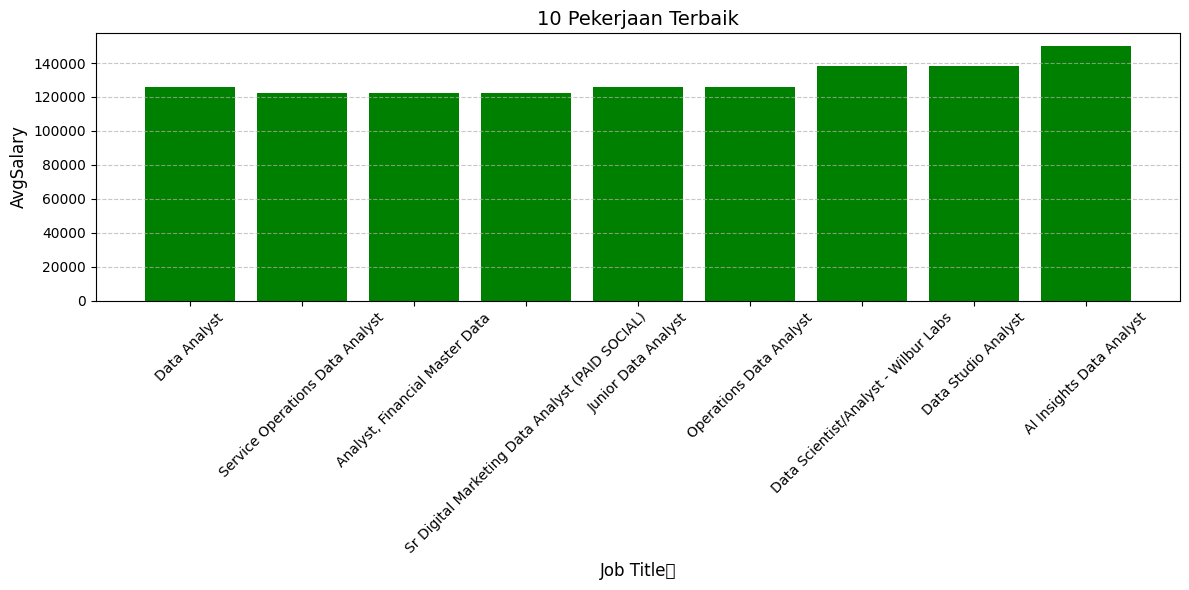

In [95]:

# Plot bar horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_salary_sorted['Job Title'], top_salary_sorted['AvgSalary'], color='skyblue')

plt.title('Top 10 Data Analyst Jobs by Average Salary (USD)')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')

# Tambahkan label angka di ujung batang
for index, value in enumerate(top_salary_sorted['AvgSalary']):
    plt.text(value + 500, index, f"${value:,.0f}", va='center')

plt.tight_layout()
plt.show()

'''
# Buat diagram batang
plt.figure(figsize=(12, 6))
plt.bar (top_salary_sorted['Job Title'], top_salary_sorted['AvgSalary'], color='green')

# Tambahkan judul dan label
plt.title('10 Pekerjaan Terbaik', fontsize=14)
plt.xlabel('Job Title	', fontsize=12)
plt.ylabel('AvgSalary', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.tight_layout()
plt.show()
'''